In [1]:
import pandas as pd

Pandas содержит две структуры данных Series и DataFrame

## Series

In [ ]:
#Series - одномерный массив данных +индексы

In [7]:
#Создание Series
my_series = pd.Series([5,6,7,8,9,10])
print(my_series)

#Работа с атрибутами
print(my_series.index) #вывод только индексов
print(my_series.values) #вывод только значений

#доступ к определённому значению по индексу
print(my_series[4])

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64
RangeIndex(start=0, stop=6, step=1)
[ 5  6  7  8  9 10]
9


In [9]:
#индексы можно задавать явно
my_series2=pd.Series([5,6,7,8,9,10],index=['a','b','c','d','e','f'])
my_series2['f']

10

In [11]:
#Выборка по нескольким индексам
my_series2[['a', 'b', 'f']]
#групповое присвоение
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

In [13]:
#Фильтрация серии
print(my_series2[my_series2 > 0])
#Арифметические операции с элементами серии
print(my_series2[my_series2 > 0] * 2)

c    7
d    8
e    9
dtype: int64
c    14
d    16
e    18
dtype: int64


In [16]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
print(my_series3)
'd' in my_series3 #проверка наличия элемента с заданным индексом

True

In [17]:
my_series3.name = 'numbers' #присваеваем имя объекту
my_series3.index.name = 'letters'#присваемаем имя индексу
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

In [18]:
#переприсваеваем индексы серии
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64

## DataFrame

DataFrame - табличный тип структуры. Столбец в DataFrame это Series

In [3]:
df = pd.DataFrame({
...     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
...     'population': [17.04, 143.5, 9.5, 45.5],
...     'square': [2724902, 17125191, 207600, 603628]
... })
print(df)

      country  population    square
0  Kazakhstan       17.04   2724902
1      Russia      143.50  17125191
2     Belarus        9.50    207600
3     Ukraine       45.50    603628


In [22]:
#Извлекаем столбец из df
print(df['country'])
#Спрашиваем тип
type(df['country'])

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object


pandas.core.series.Series

In [24]:
#Смотрим индексы столбцов
print(df.columns)
#Смотрим индексы строк
print(df.index)

Index(['country', 'population', 'square'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


## Доступ по индексу 

заменяем индексы цифр на индексы из кодов стран

In [54]:
df = pd.DataFrame({
...     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
...     'population': [17.04, 143.5, 9.5, 45.5],
...     'square': [2724902, 17125191, 207600, 603628]
... },index=['KZ', 'RU', 'BY', 'UA'])
print(df)

       country  population    square
KZ  Kazakhstan       17.04   2724902
RU      Russia      143.50  17125191
BY     Belarus        9.50    207600
UA     Ukraine       45.50    603628


In [55]:
df.index = ['KZ', 'RU', 'BY', 'UA']
#меняем индексы на лету
df.index.name = 'Country Code'
#называем столбец с индексами
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [56]:
# выводим столбец country
df['country']

Country Code
KZ    Kazakhstan
RU        Russia
BY       Belarus
UA       Ukraine
Name: country, dtype: object

In [57]:
#доступ к строке по строковой метке
print(df.loc['KZ'])
#доступ к строке по числовому значению
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object


country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [58]:
#выборка по индексу и интересующим колонкам
df.loc[['KZ', 'RU'], 'population']

Country Code
KZ     17.04
RU    143.50
Name: population, dtype: float64

In [59]:
#Слайсинг
df.loc['KZ':'BY', :]

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600


In [60]:
#Фильтрация
df[df.population > 10][['country', 'square']]

,country,square
Country Code,,
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


In [61]:
#Сброс индексов(отодвигает)
df.reset_index()

,Country Code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [62]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Country Code'
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [63]:
#Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [66]:

#удаление столбца
df.drop(['density'],axis='columns')
#альтернативный способ

del df['density']

In [68]:
df.reset_index()

,Country Code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [70]:
#переименовываем столбец
df = df.rename(columns={'square': 'area'})
print(df)

                 country  population      area
Country Code                                  
KZ            Kazakhstan       17.04   2724902
RU                Russia      143.50  17125191
BY               Belarus        9.50    207600
UA               Ukraine       45.50    603628


## Чтение и запись данных 

In [71]:
#Сохраняем df в csv файл
df.to_csv('filename.csv')

In [72]:
#Читаем df из csv файла
df = pd.read_csv('filename.csv', sep=',')

## Группировка и агрегирование в pandas

In [73]:
#Важно иметь файл titanic.csv в папке со текущим ipynb файлом
titanic_df = pd.read_csv('titanic.csv') #импортируем файл
print(titanic_df.head())

   PassengerID                                           Name PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton    1st  29.00   
1            2                    Allison, Miss Helen Loraine    1st   2.00   
2            3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4            5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  SexCode  
0  female         1        1  
1  female         0        1  
2    male         0        0  
3  female         0        1  
4    male         1        0  


In [74]:
#посчитаем сколько женщин и мужчин выжило, а сколько нет.
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count())

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64


In [75]:
#В разрезе класса кают
print(titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count())

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64


In [76]:
#стоит задача посчитать сколько всего женщин и мужчин было в конкретном классе корабля
titanic_df = pd.read_csv('titanic.csv')
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')

In [77]:
print(pvt.loc['female', ['1st', '2nd', '3rd']])

PClass
1st    143.0
2nd    107.0
3rd    212.0
Name: female, dtype: float64


## Анализ временных рядов 

In [78]:
import pandas as pd
df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
df = df.sort_index()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None


In [79]:
# узнаем среднюю цену акции (mean) на закрытии (Close)
df.loc['2012-Feb', 'Close'].mean()

528.4820021999999

In [80]:
# если взять промежуток с февраля 2012 по февраль 2015 и посчитать среднее:
df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

430.43968317018414

In [81]:
#если нам нужно узнать среднюю цену закрытия по неделям
df.resample('W')['Close'].mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
                 ...    
2017-01-29    121.164000
2017-02-05    125.867999
2017-02-12    131.679996
2017-02-19    134.978000
2017-02-26    136.904999
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

## Визуализация данных

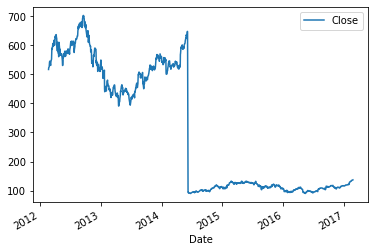

In [82]:
#Для визуализации данных используется библиотека matplotlib
import matplotlib.pyplot as plt

new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()